# <span style="color:blue; font-size:16;">Ask the Expert SASPy Demo</span>

## Important links
Doc: https://sassoftware.github.io/saspy/index.html
        
Repo: https://github.com/sassoftware/saspy
        
    Issues: https://github.com/sassoftware/saspy/issues
        
    Releases: https://github.com/sassoftware/saspy/releases
        
Examples: https://github.com/sassoftware/saspy-examples
        
SGF Paper: https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2020/4141-2020.pdf
        

# Import the saspy module to get access to SAS
## to see where saspy is installed (where you're running from) just submit saspy after importing it

In [1]:
import saspy
saspy

<module 'saspy' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\saspy\\__init__.py'>

### And to see the default config file it will use, just submit this

In [2]:
saspy.SAScfg

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\saspy\\sascfg_personal.py'

### To see all config files that may exist in the search paths, just submit this

In [3]:
saspy.list_configs()

['C:\\ProgramData\\Anaconda3\\lib\\site-packages\\saspy\\sascfg_personal.py',
 'C:\\Users\\sastpw/.config/saspy\\sascfg_personal.py']

# Instantiate a SASsession object. This creates the SAS session that will be used for this notebook
## And submit the SASsession object to get info about your session

In [4]:
sas = saspy.SASsession(cfgname='winlocal', results='HTML')
sas

SAS Connection established. Subprocess id is 8084



Access Method         = IOM
SAS Config name       = winlocal
SAS Config file       = C:\ProgramData\Anaconda3\lib\site-packages\saspy\sascfg_personal.py
WORK Path             = C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD13592_d10a626_\Prc2\
SAS Version           = 9.04.01M5P09132017
SASPy Version         = 3.7.4
Teach me SAS          = False
Batch                 = False
Results               = HTML
SAS Session Encoding  = utf-8
Python Encoding value = utf8
SAS process Pid value = 13592


In [5]:
type(sas)
# sas.

saspy.sasbase.SASsession

## You can connect to Viya in the cloud using SSO Authentication

In [6]:
# https://binder.demo.sas.com/SASLogon/oauth/authorize?client_id=SASPy&response_type=code
sasv = saspy.SASsession(cfgname='SGF_Viya', results='HTML', authcode='6r6nTk84mv')
sasv

SAS server started using Context SAS Job Execution compute context with SESSION_ID=fc817f84-66de-4181-8b7a-8176cbeb7fb2-ses0000


Access Method         = HTTP
SAS Config name       = SGF_Viya
SAS Config file       = C:\ProgramData\Anaconda3\lib\site-packages\saspy\sascfg_personal.py
WORK Path             = /opt/sas/viya/config/var/tmp/compsrv/default/fc817f84-66de-4181-8b7a-8176cbeb7fb2/SAS_work2DE3000000B5_sas-launcher-0d00e995-a55c-4ff0-bebb-78a65aeeab9e-929q7/
SAS Version           = V.04.00M0P04182021
SASPy Version         = 3.7.4
Teach me SAS          = False
Batch                 = False
Results               = HTML
SAS Session Encoding  = utf-8
Python Encoding value = utf_8
SAS process Pid value = 181


## STDIO over SSH is now available from Windows client to a SAS install on Linux

In [7]:
sass = saspy.SASsession(cfgname='ssh')
sass

SAS Connection established. Subprocess id is 26776

No encoding value provided. Will try to determine the correct encoding.
Setting encoding to latin_1 based upon the SAS session encoding value of latin1.



Access Method         = SSH
SAS Config name       = ssh
SAS Config file       = C:\ProgramData\Anaconda3\lib\site-packages\saspy\sascfg_personal.py
WORK Path             = /sastmp/SAS_workF9DE00006308_tom64-4/
SAS Version           = 9.04.01M6D11072018
SASPy Version         = 3.7.4
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = latin1
Python Encoding value = latin_1
SAS process Pid value = 25352


In [8]:
sas.assigned_librefs()

['WORK', 'SASHELP', 'MAPS', 'MAPSSAS', 'MAPSGFK', 'SASUSER']

# Remember that you can always get at the SASLOG.
## so you can see the LOG from the last submitted code, or the entire Session LOG

In [9]:
print(sas.lastlog())


7                                                       The SAS System                    Tuesday, August 24, 2021 12:08:00 PM

34         
35         
36                 data _null_; retain libref; retain cobs 1;
37                    set sashelp.vlibnam end=last;
38                    if cobs EQ 1 then
39                       put "LIBREFSSTART=";
40                    cobs = 2;
41                    if libref NE libname then
42                       put  %upcase("lib=") libname  %upcase('libEND=');
43                    libref = libname;
44                    if last then
45                       put "LIBREFSEND=";
46                 run;

LIBREFSSTART=
LIB=WORK LIBEND=
LIB=SASHELP LIBEND=
LIB=MAPS LIBEND=
LIB=MAPSSAS LIBEND=
LIB=MAPSGFK LIBEND=
LIB=SASUSER LIBEND=
LIBREFSEND=
NOTE: There were 148 observations read from the data set SASHELP.VLIBNAM.
NOTE: DATA statement used (Total process time):
      real time           0.03 seconds
      cpu time            0.01 seconds
      



In [10]:
print(sas.saslog())


1                                                          The SAS System                       Tuesday, August 24, 2021 12:08:00 PM

NOTE: Copyright (c) 2016 by SAS Institute Inc., Cary, NC, USA. 
NOTE: SAS (r) Proprietary Software 9.4 (TS1M5 MBCS3170) 
      Licensed to Weber Tom-1347, Site 70068128.
NOTE: This session is executing on the X64_10PRO  platform.



NOTE: Updated analytical products:
      
      SAS/STAT 14.3
      SAS/ETS 14.3
      SAS/OR 14.3
      SAS/QC 14.3

NOTE: Additional host information:

 X64_10PRO WIN 10.0.18362  Workstation

NOTE: SAS Initialization used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      
1          ;*';*";*/;
2          options svgtitle='svgtitle'; options validvarname=any validmemname=extend pagesize=max nosyntaxcheck; ods graphics on;
3          
4          ;*';*";*/;
5          

2                                                          The SAS System                       Tuesda

## Create a SASdata object to use to access the cars data set in the sashelp library. 
### And submit it to see info about it too

In [11]:
sales = sas.sasdata('prdsale','sashelp')
sales

Libref  = sashelp
Table   = prdsale
Dsopts  = {}
Results = HTML

In [12]:
type(sales)
# sales.

saspy.sasdata.SASdata

In [13]:
sales.means()

Variable,Label,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
ACTUAL,Actual Sales,1440,0,503.000000,507.178472,287.031306,3.000000,261.000000,503.000000,756.500000,1000.000000
PREDICT,Predicted Sales,1440,0,486.000000,490.482639,285.766790,0,239.500000,486.000000,739.000000,1000.000000
QUARTER,Quarter,1440,0,2.500000,2.500000,1.118422,1.000000,1.500000,2.500000,3.500000,4.000000
YEAR,Year,1440,0,1993.500000,1993.500000,0.500174,1993.000000,1993.000000,1993.500000,1994.000000,1994.000000
MONTH,Month,1440,0,12404,12403,210.629158,12054,12220,12404,12585,12753


In [14]:
sales.contents(results='text')


                                                        The SAS System                Tuesday, August 24, 2021 12:08:00 PM   2

                                                    The CONTENTS Procedure

                          Data Set Name        SASHELP.PRDSALE           Observations          1440
                          Member Type          DATA                      Variables             10  
                          Engine               V9                        Indexes               0   
                          Created              09/06/2017 22:58:08       Observation Length    96  
                          Last Modified        09/06/2017 22:58:08       Deleted Observations  0   
                          Protection                                     Compressed            NO  
                          Data Set Type                                  Sorted                NO  
                          Label                Furniture sales data                            

## Lets use each of the RESULTS= options to see the output

In [15]:
salesp = sas.sasdata('prdsale', libref='sashelp', results='pandas')
salesh = sas.sasdata('prdsale', libref='sashelp', results='html')
salest = sas.sasdata('prdsale', libref='sashelp', results='text')
print(salesp,'\n', salesh, '\n', salest)

Libref  = sashelp
Table   = prdsale
Dsopts  = {}
Results = pandas
 
 Libref  = sashelp
Table   = prdsale
Dsopts  = {}
Results = html
 
 Libref  = sashelp
Table   = prdsale
Dsopts  = {}
Results = text



In [16]:
salesp.tail()

,ACTUAL,PREDICT,COUNTRY,REGION,DIVISION,PRODTYPE,PRODUCT,QUARTER,YEAR,MONTH
0,909.0,874.0,U.S.A.,WEST,CONSUMER,OFFICE,DESK,3.0,1994.0,1994-08-01
1,251.0,805.0,U.S.A.,WEST,CONSUMER,OFFICE,DESK,3.0,1994.0,1994-09-01
2,526.0,426.0,U.S.A.,WEST,CONSUMER,OFFICE,DESK,4.0,1994.0,1994-10-01
3,652.0,932.0,U.S.A.,WEST,CONSUMER,OFFICE,DESK,4.0,1994.0,1994-11-01
4,573.0,581.0,U.S.A.,WEST,CONSUMER,OFFICE,DESK,4.0,1994.0,1994-12-01


In [17]:
salesh.tail()

Obs,ACTUAL,PREDICT,COUNTRY,REGION,DIVISION,PRODTYPE,PRODUCT,QUARTER,YEAR,MONTH
1436,$909.00,$874.00,U.S.A.,WEST,CONSUMER,OFFICE,DESK,3,1994,Aug
1437,$251.00,$805.00,U.S.A.,WEST,CONSUMER,OFFICE,DESK,3,1994,Sep
1438,$526.00,$426.00,U.S.A.,WEST,CONSUMER,OFFICE,DESK,4,1994,Oct
1439,$652.00,$932.00,U.S.A.,WEST,CONSUMER,OFFICE,DESK,4,1994,Nov
1440,$573.00,$581.00,U.S.A.,WEST,CONSUMER,OFFICE,DESK,4,1994,Dec


In [18]:
salest.tail()


                                                        The SAS System                Tuesday, August 24, 2021 12:08:00 PM   9

 Obs         ACTUAL        PREDICT   COUNTRY      REGION       DIVISION     PRODTYPE     PRODUCT       QUARTER   YEAR   MONTH

1436        $909.00        $874.00   U.S.A.       WEST         CONSUMER     OFFICE       DESK                3   1994    Aug 
1437        $251.00        $805.00   U.S.A.       WEST         CONSUMER     OFFICE       DESK                3   1994    Sep 
1438        $526.00        $426.00   U.S.A.       WEST         CONSUMER     OFFICE       DESK                4   1994    Oct 
1439        $652.00        $932.00   U.S.A.       WEST         CONSUMER     OFFICE       DESK                4   1994    Nov 
1440        $573.00        $581.00   U.S.A.       WEST         CONSUMER     OFFICE       DESK                4   1994    Dec 



## Don't forget about being able to use DataSet OPTionS:  DSOPTS=

In [19]:
cars = sas.sasdata('cars','sashelp', dsopts={'drop':"origin wheelbase length weight"})
cars

Libref  = sashelp
Table   = cars
Dsopts  = {'drop': 'origin wheelbase length weight'}
Results = HTML

In [20]:
cars.head(10)

Obs,Make,Model,Type,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway
1,Acura,MDX,SUV,All,"$36,945","$33,337",3.5,6,265,17,23
2,Acura,RSX Type S 2dr,Sedan,Front,"$23,820","$21,761",2.0,4,200,24,31
3,Acura,TSX 4dr,Sedan,Front,"$26,990","$24,647",2.4,4,200,22,29
4,Acura,TL 4dr,Sedan,Front,"$33,195","$30,299",3.2,6,270,20,28
5,Acura,3.5 RL 4dr,Sedan,Front,"$43,755","$39,014",3.5,6,225,18,24
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Front,"$46,100","$41,100",3.5,6,225,18,24
7,Acura,NSX coupe 2dr manual S,Sports,Rear,"$89,765","$79,978",3.2,6,290,17,24
8,Audi,A4 1.8T 4dr,Sedan,Front,"$25,940","$23,508",1.8,4,170,22,31
9,Audi,A41.8T convertible 2dr,Sedan,Front,"$35,940","$32,506",1.8,4,170,23,30
10,Audi,A4 3.0 4dr,Sedan,Front,"$31,840","$28,846",3.0,6,220,20,28


In [21]:
print(sas.lastlog())


70                                                      The SAS System                    Tuesday, August 24, 2021 12:08:00 PM

401        ;*';*";*/;
402        data _null_; e = exist("sashelp.'cars'n");
403        v = exist("sashelp.'cars'n", 'VIEW');
404         if e or v then e = 1;
405        te='TABLE_EXISTS='; put te e;run;

TABLE_EXISTS= 1
NOTE: DATA statement used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      

406        
407        
408        ;*';*";*/;
409        

71                                                      The SAS System                    Tuesday, August 24, 2021 12:08:00 PM

410        
411        %put E3969440A681A2408885998500000035;
E3969440A681A2408885998500000035
412        

72                                                      The SAS System                    Tuesday, August 24, 2021 12:08:00 PM

413        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode=

## Here are a few sapy methods embedded in Python code


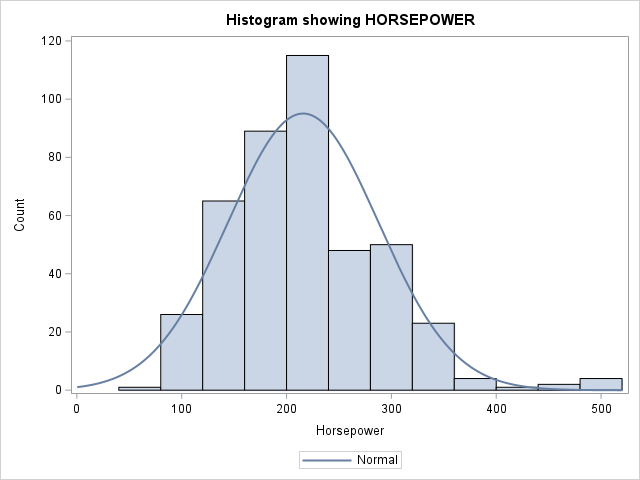


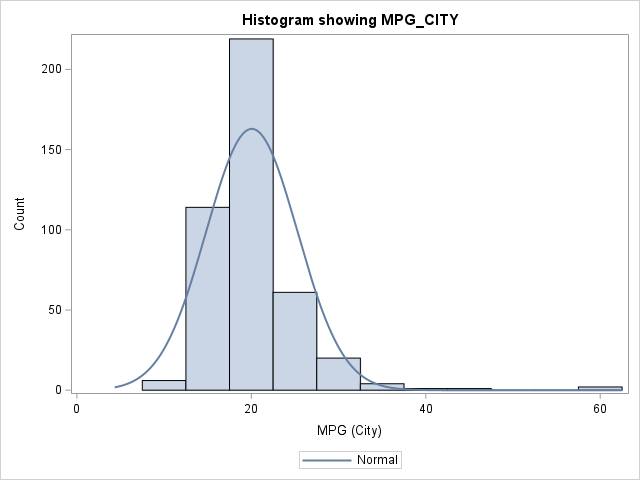


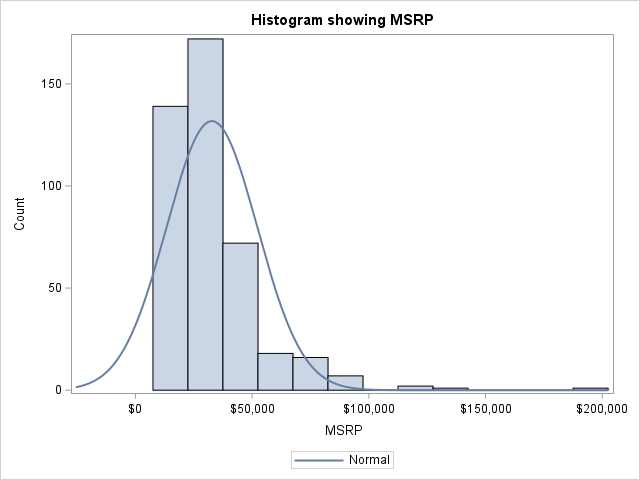

In [22]:
for col in ['horsepower','MPG_City', 'MSRP']:
    cars.hist(col, title='Histogram showing '+col.upper())

# you can get a list of the assigned libraries in your session

In [23]:
for libref in sas.assigned_librefs():
    print(libref)

WORK
SASHELP
MAPS
MAPSSAS
MAPSGFK
SASUSER


### see what tables (data sets or views) are in a library which saspy can access directly 

In [24]:
for mem in sas.list_tables('sasuser'):
    print(mem)

('SASMBC', 'DATA')
('YX1X2', 'DATA')


## Get information about a library including everything that's in it?

In [25]:
sas.datasets('sasuser')

### What code was generated for that method? No surprise here :)

In [26]:
print(sas.lastlog())


94                                                      The SAS System                    Tuesday, August 24, 2021 12:08:00 PM

570        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg
570      ! style=HTMLBlue; ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
571        
572        proc datasets dd=sasuser;
572      !                           quit;

NOTE: PROCEDURE DATASETS used (Total process time):
      real time           0.01 seconds
      cpu time            0.01 seconds
      

573        
574        
575        ods html5 (id=saspy_internal) close;ods listing;
576        

95                                                      The SAS System                    Tuesday, August 24, 2021 12:08:00 PM

577        


# Don't have a method for everything you can do w/ SAS
### With the submit() method, you can submit your own SAS code.

In [27]:
ll = sas.submit("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""")

### submit() returns a dictionary with the results from the SASLOG and the Listing (output)
### You can print the LOG, it's text, and use the helper methods to display the LIST which is HTML

In [28]:
type(ll)

dict

In [29]:
ll.keys()

dict_keys(['LOG', 'LST'])

In [30]:
print(ll['LOG'])


96                                                      The SAS System                    Tuesday, August 24, 2021 12:08:00 PM

580        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg
580      ! style=HTMLBlue; ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
581        
582        
583        libname work list;
NOTE: Libref=   WORK 
      Scope=    IOM ROOT COMP ENV
      Engine=   V9
      Access=   TEMP
      Physical Name= C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD13592_d10a626_\Prc2
      Filename= C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD13592_d10a626_\Prc2
      Owner Name= CARYNT\sastpw
      File Size=              4KB
      File Size (bytes)= 4096
584        
585        proc sql;
586           select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
587           from sashelp.cars
588           group by type
589           o

### to display HTML yourself, you can use the helper functions: sas.DISPLAY(sas.HTML(result)) or sas.HTML(result) depending on notebook

In [31]:
sas.HTML(ll['LST'])
#sas.DISPLAY(sas.HTML(ll['LST']))  # need both on Zeppelin

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


### Since V3.1.8 there are convenience submit methods, which render the log and/or the list automatically

In [32]:
sas.submitLOG("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""")


98                                                      The SAS System                    Tuesday, August 24, 2021 12:08:00 PM

599        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg
599      ! style=HTMLBlue; ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
600        
601        
602        libname work list;
NOTE: Libref=   WORK 
      Scope=    IOM ROOT COMP ENV
      Engine=   V9
      Access=   TEMP
      Physical Name= C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD13592_d10a626_\Prc2
      Filename= C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD13592_d10a626_\Prc2
      Owner Name= CARYNT\sastpw
      File Size=              4KB
      File Size (bytes)= 4096
603        
604        proc sql;
605           select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
606           from sashelp.cars
607           group by type
608           o

In [33]:
sas.submitLST("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""")

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


### The submitLST() method has an option for controling the output too! 
### method = [**'listorlog'** | 'listonly' | 'listandlog' | 'logandlist']

In [34]:
sas.submitLST("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""") # , method = ['listorlog' | 'listonly' | 'listandlog' | 'logandlist'])

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


### listorlog is handy when you expect some results, but if there's an error and none are produced, you get the log instead

In [35]:
sas.submitLST("""
libname work list;

p r o c s q l;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""") #,method='listonly')

In [36]:
sas.submitLST("""
libname work list;

p r o c s q l;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""",method='listonly')

### When you want to see both, then set listandlog, or logandlist, depending on the order you'd like to see them

In [37]:
sas.submitLST("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""", method='listandlog')

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


In [38]:
sas.submitLST("""
libname work list;

proc sql;
   select type, count(*) as 'number of models'n, avg(MPG_city) as 'Avg(MPG_City)'n
   from sashelp.cars
   group by type
   order by 3 desc;
quit; 
""", method='logandlist')

Type,number of models,Avg(MPG_City)
Hybrid,3,55
Wagon,30,21.1
Sedan,262,21.08397
Sports,49,18.40816
Truck,24,16.5
SUV,60,16.1


## We can transfer data between SAS Data Sets and Pandas Data Frames 

In [39]:
#car_df = sas.sd2df('cars','sashelp')   # if you don't already have the SASdata object
car_df = cars.to_df()

In [40]:
type(car_df)

pandas.core.frame.DataFrame

In [41]:
car_df.head()

,Make,Model,Type,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway
0,Acura,MDX,SUV,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0
1,Acura,RSX Type S 2dr,Sedan,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0
2,Acura,TSX 4dr,Sedan,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0
3,Acura,TL 4dr,Sedan,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0
4,Acura,3.5 RL 4dr,Sedan,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0


In [42]:
cars.head()

Obs,Make,Model,Type,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway
1,Acura,MDX,SUV,All,"$36,945","$33,337",3.5,6,265,17,23
2,Acura,RSX Type S 2dr,Sedan,Front,"$23,820","$21,761",2.0,4,200,24,31
3,Acura,TSX 4dr,Sedan,Front,"$26,990","$24,647",2.4,4,200,22,29
4,Acura,TL 4dr,Sedan,Front,"$33,195","$30,299",3.2,6,270,20,28
5,Acura,3.5 RL 4dr,Sedan,Front,"$43,755","$39,014",3.5,6,225,18,24


In [43]:
car_df.dtypes

Make            object
Model           object
Type            object
DriveTrain      object
MSRP           float64
Invoice        float64
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
dtype: object

In [44]:
cars.columnInfo()

 Data Frames **describe** method matches up with our Proc Means. SASdata object has the **describe** method (and **means** as an alias method)

In [45]:
car_df.describe()#.transpose()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000


In [46]:
cars.describe()

Variable,Label,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,Engine Size (L),428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,MPG (City),428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,MPG (Highway),428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000


## Now round trip the Data Frame back to a SAS Data Set

In [47]:
cars_full_circle = sas.df2sd(car_df, 'cfc')

In [48]:
cars_full_circle.describe()

Variable,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000


In [49]:
sas.list_tables()

[('CFC', 'DATA')]

# Let's look at some analytic methods

In [50]:
stat = sas.sasstat()

In [51]:
#stat.                 # use the 'dot Tab ' to see the methods available

### Let's run a regression which will return us a SASresults object that we can use to see any/all of the results

In [52]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize',data=cars)

In [53]:
dir(stat_results)

['ANOVA',
 'COOKSDPLOT',
 'DFBETASPANEL',
 'DFFITSPLOT',
 'DIAGNOSTICSPANEL',
 'FITSTATISTICS',
 'LOG',
 'NOBS',
 'OBSERVEDBYPREDICTED',
 'PARAMETERESTIMATES',
 'QQPLOT',
 'RESIDUALBOXPLOT',
 'RESIDUALBYPREDICTED',
 'RESIDUALHISTOGRAM',
 'RESIDUALPLOT',
 'RFPLOT',
 'RSTUDENTBYLEVERAGE',
 'RSTUDENTBYPREDICTED']

### Pick any one you want ...

In [54]:
stat_results.ANOVA

### Or display them ALL  (Click in the pannel to the Left of the results below to expand/shrink the result pane)


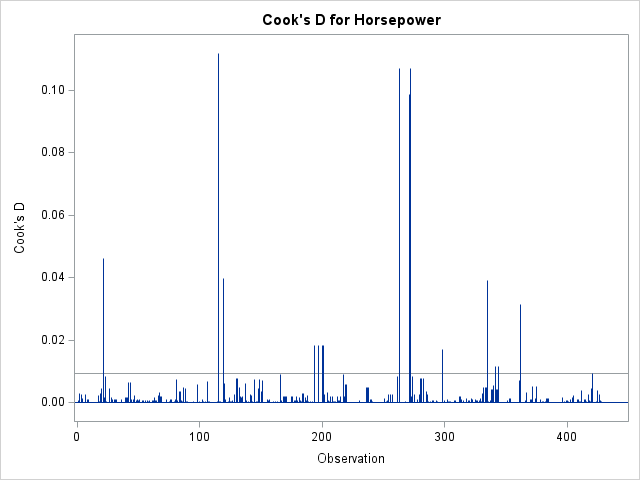


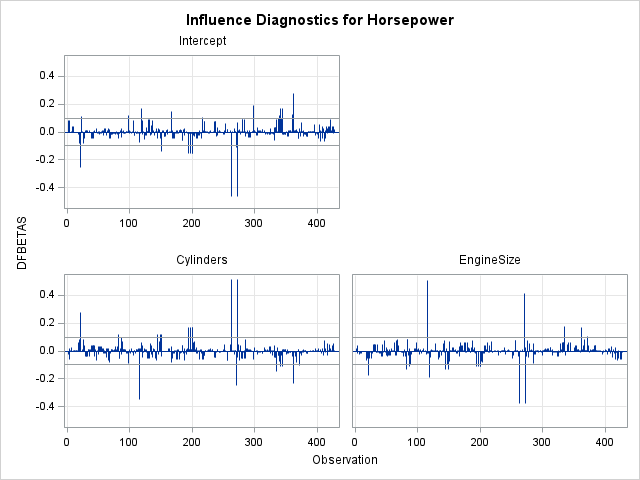


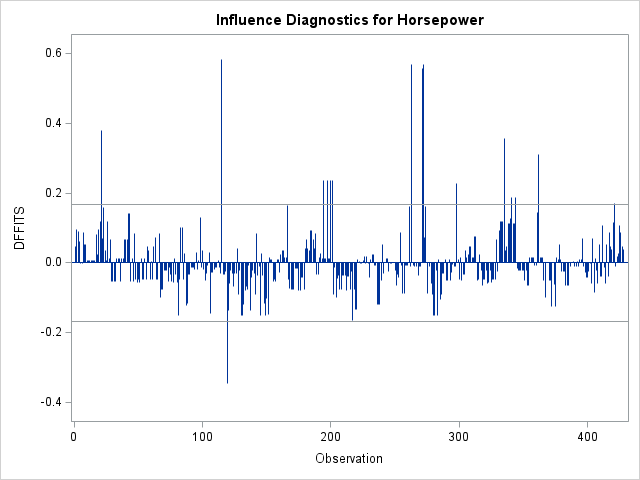


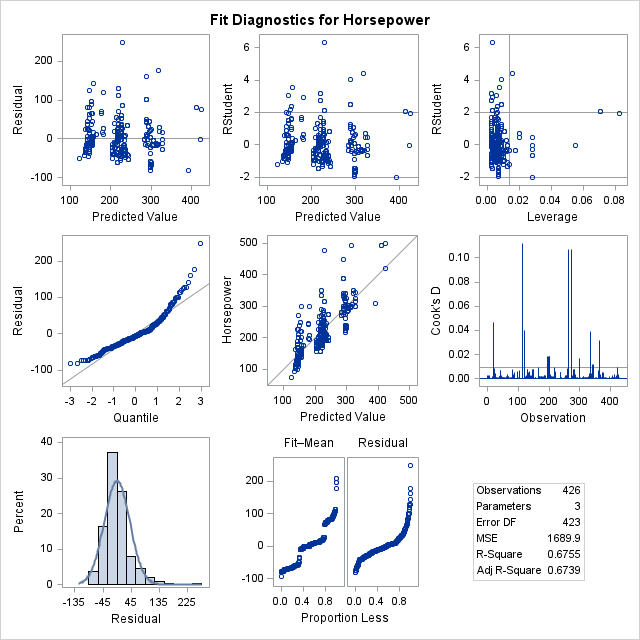

Root MSE,41.10897,R-Square,0.6755
Dependent Mean,215.87793,Adj R-Sq,0.6739
Coeff Var,19.04269,,


Number of Observations Read,428
Number of Observations Used,426
Number of Observations with Missing Values,2



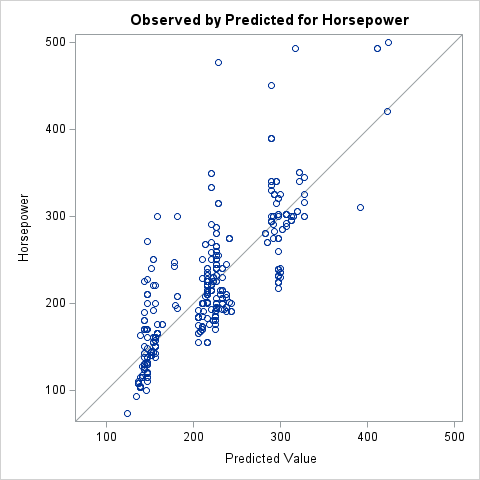


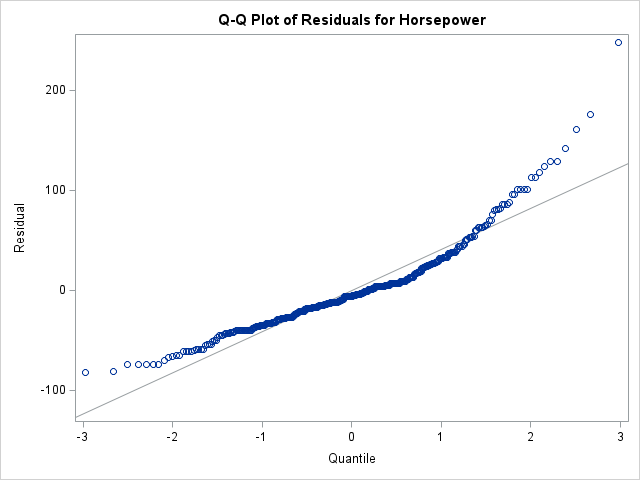


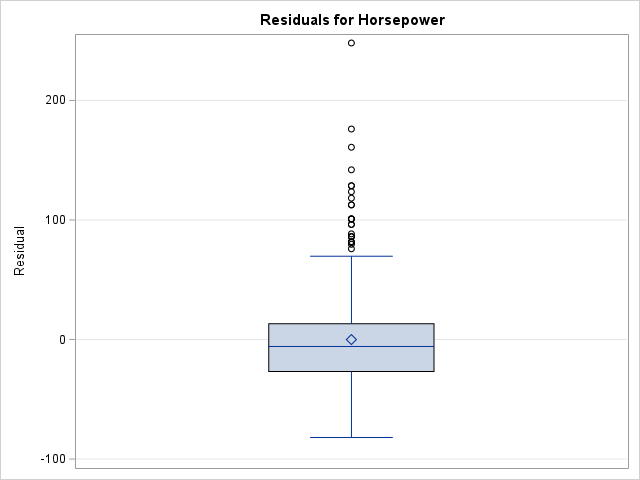


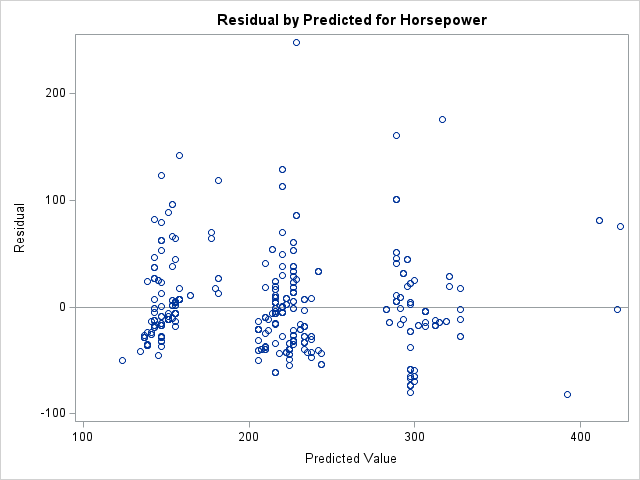


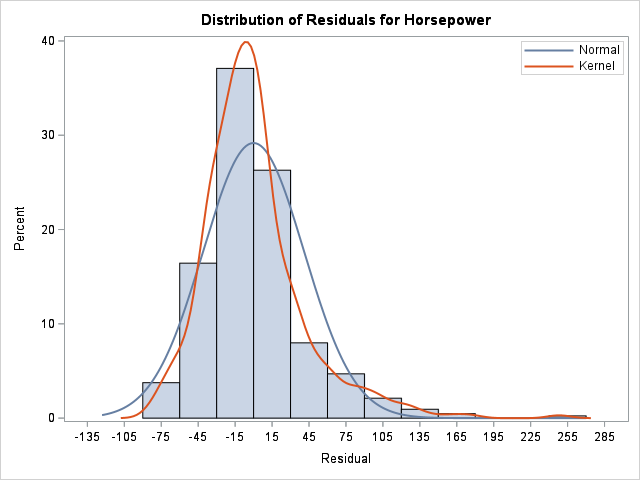


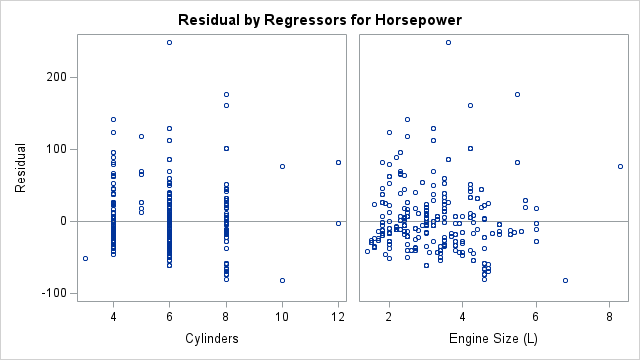


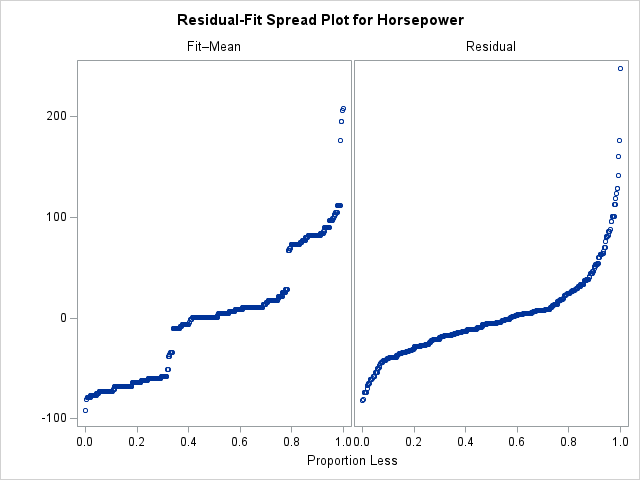


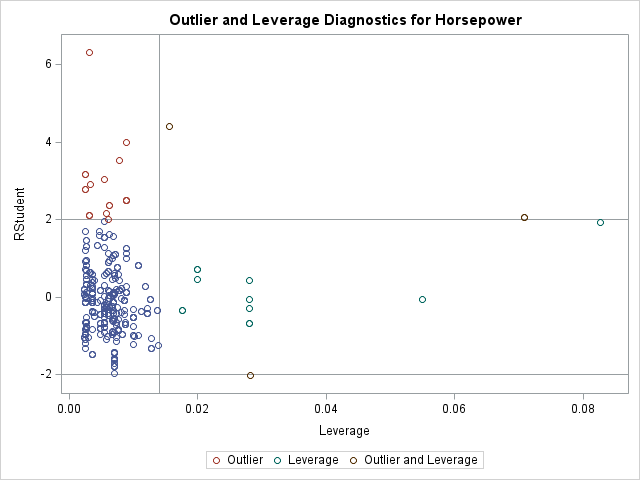


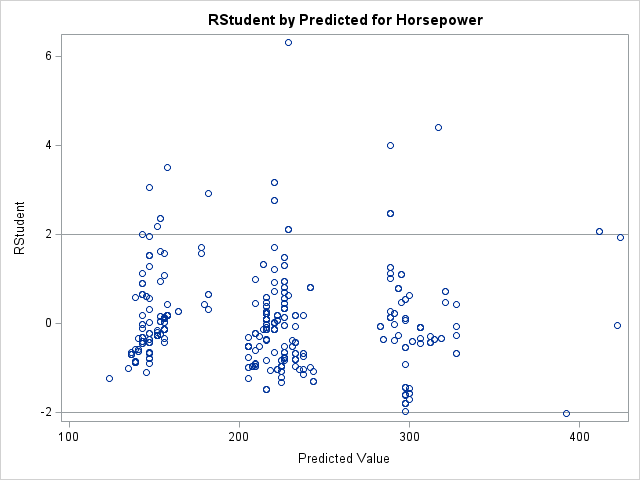

In [55]:
stat_results.ALL()

In [56]:
tree = stat.hpsplit(model='horsepower = Cylinders EngineSize',data=cars)


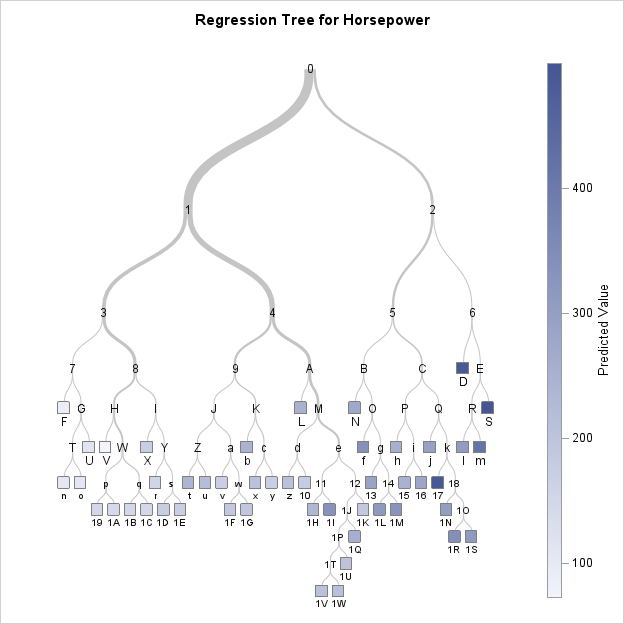

In [57]:
tree.WHOLETREEPLOT


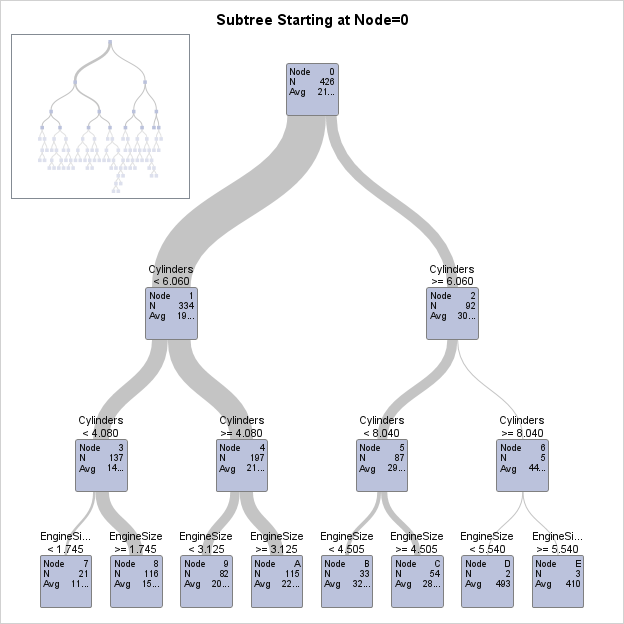

In [58]:
tree.ZOOMEDTREEPLOT

### Proc SQL anyone???  
#### And you can use the SASLIB method of the SASsession to assign any data you like (Teradata, Hadoop, ...)

In [59]:
#sas.saslib('Tera', engine='Teradata', options='user=&me pw=&mypw server=teracop1', prompt={'me': False, 'mypw': True})
sas.submitLOG("""
proc sql; 
   create table sales as select month, sum(actual) as tot_sales, sum(predict) as predicted_sales
   from sashelp.prdsale 
   group by 1 
   order by month;
quit;""")

# get SASdata object for that new table
prdsales = sas.sasdata('sales')
prdsales


212                                                     The SAS System                    Tuesday, August 24, 2021 12:08:00 PM

1888       ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg
1888     ! style=HTMLBlue; ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
1889       
1890       
1891       proc sql;
1892          create table sales as select month, sum(actual) as tot_sales, sum(predict) as predicted_sales
1893          from sashelp.prdsale
1894          group by 1
1895          order by month;
NOTE: Table WORK.SALES created, with 24 rows and 3 columns.

1896       quit;
NOTE: PROCEDURE SQL used (Total process time):
      real time           0.00 seconds
      cpu time            0.01 seconds
      

1897       
1898       
1899       ods html5 (id=saspy_internal) close;ods listing;
1900       

213                                                     The SAS System                    

Libref  = WORK
Table   = sales
Dsopts  = {}
Results = HTML

### Let's chart our sales for the aggregate table we created with the Proc SQL


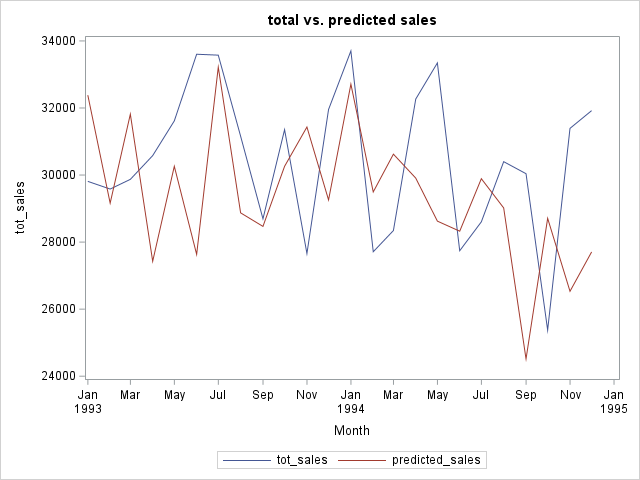

In [60]:
prdsales.series(y=['tot_sales','predicted_sales'], x='month', title='total vs. predicted sales')

## How would we get these results in a batch python script? Set batch to True and get the HTML returned to you to write out to a file and view later

In [61]:
sas.set_batch (True)

In [62]:
q = stat_results.DFBETASPANEL

### q is the Dict with the LOG and LST. The LST is the HTML of the result. We'll display it here, but if you write it to a file it will render when you open it in a web browser too.


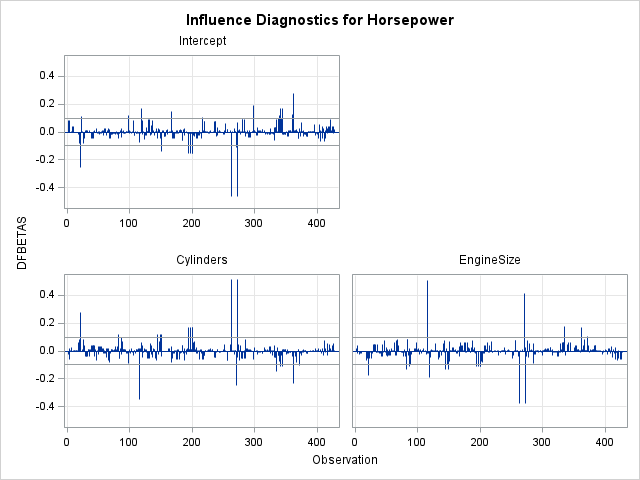

In [63]:
sas.HTML(q['LST'])

### the ALL() method returns a List of Dict's which is easy to traverse. Can write them out to their own files to view later. Just display them here for now.


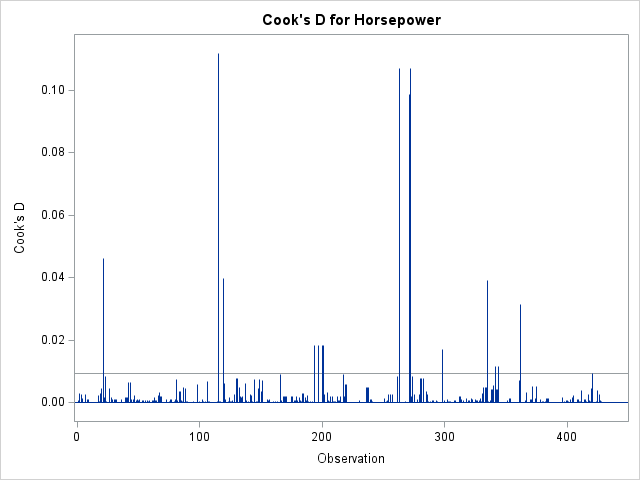


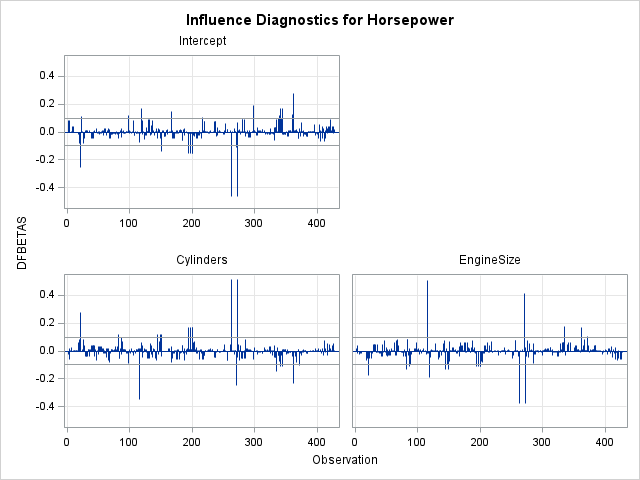


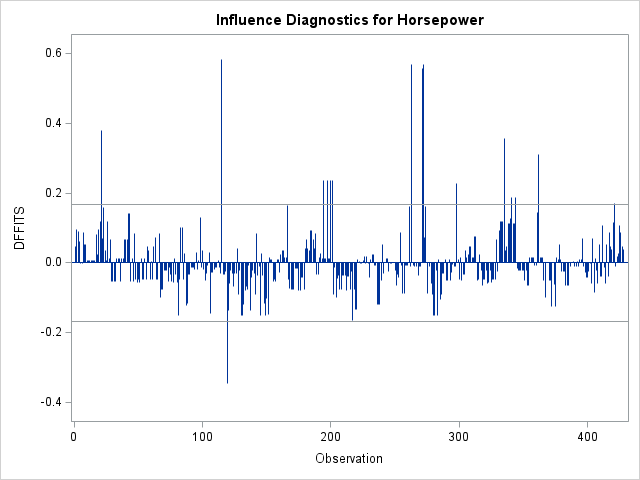


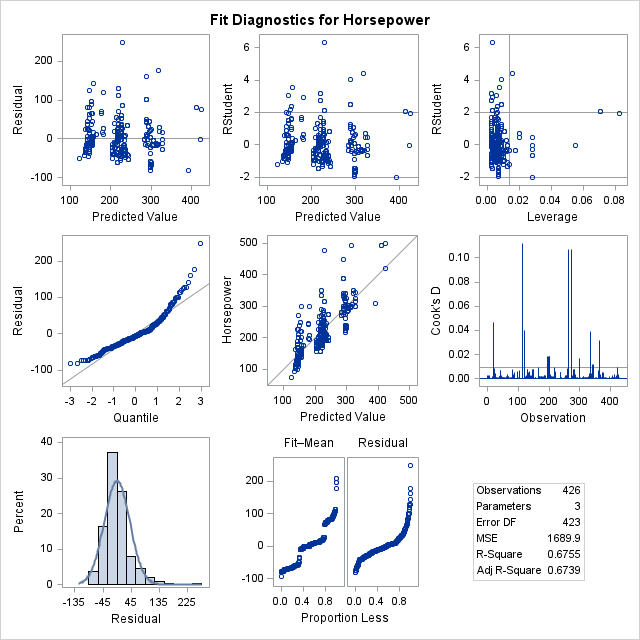

Root MSE,41.10897,R-Square,0.6755
Dependent Mean,215.87793,Adj R-Sq,0.6739
Coeff Var,19.04269,,


Number of Observations Read,428
Number of Observations Used,426
Number of Observations with Missing Values,2



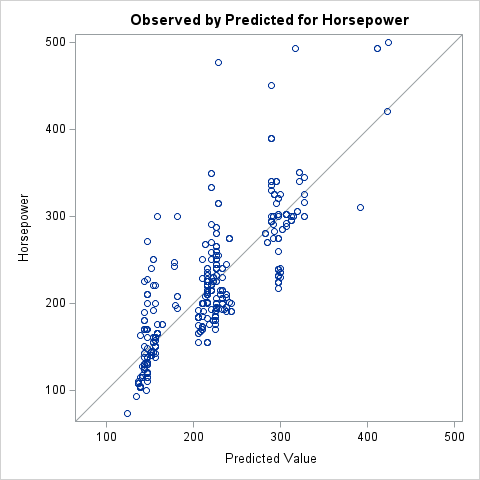


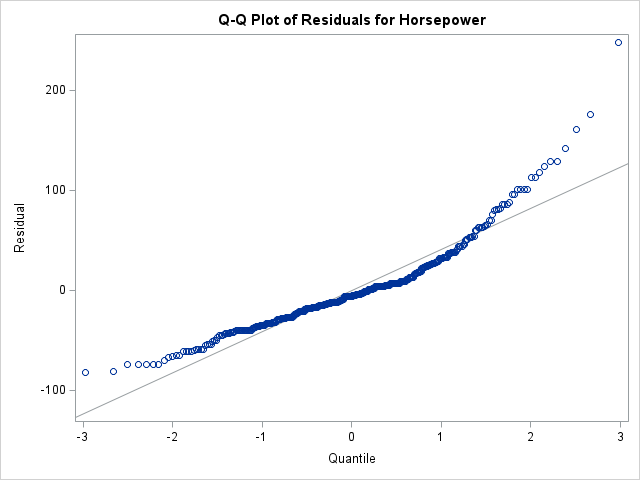


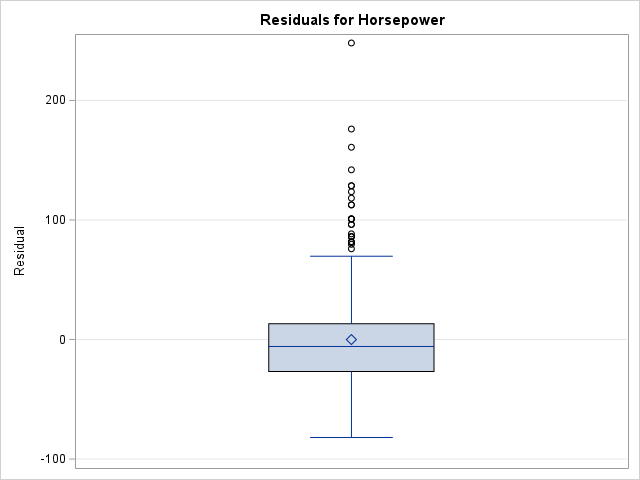


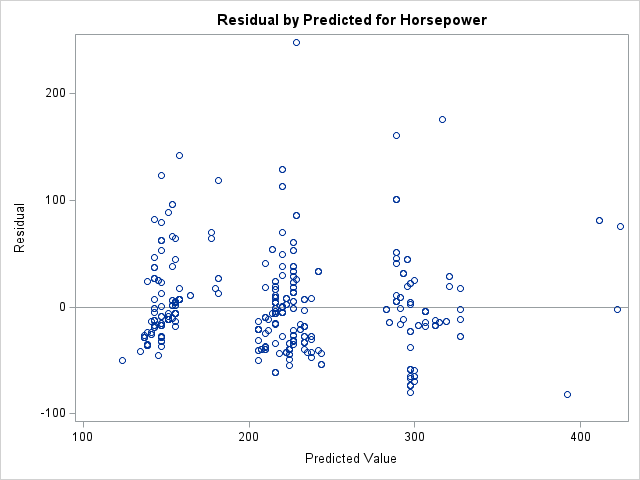


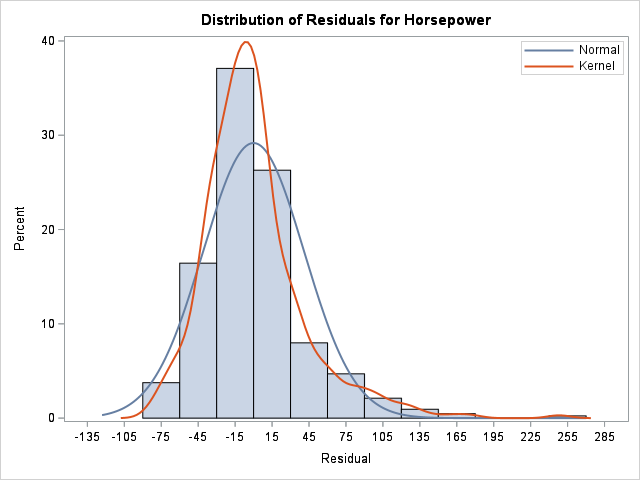


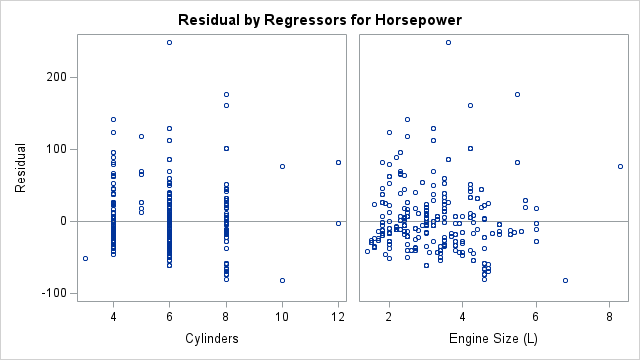


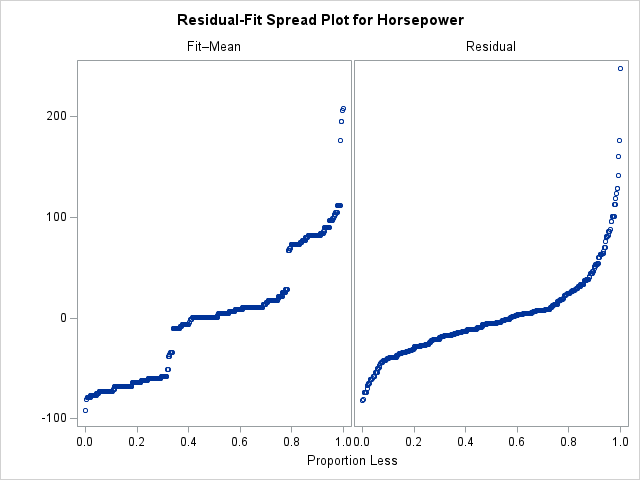


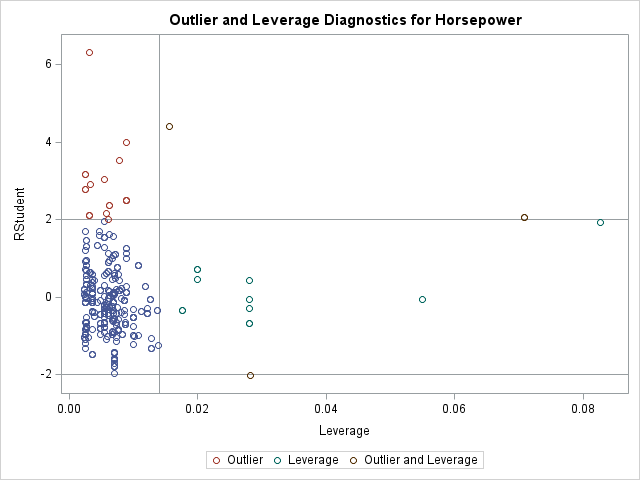


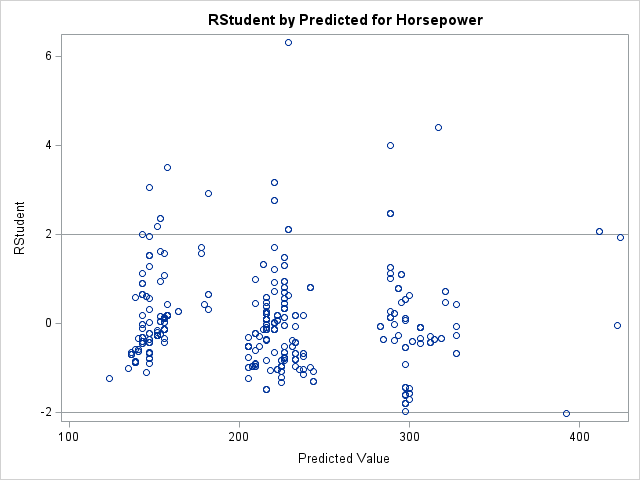

In [64]:
all_results = stat_results.ALL()
for res in all_results:
    if isinstance(res, dict):
        sas.DISPLAY(sas.HTML(res['LST']))
    else: # log is a string, not a dict
        print(res)

## So lets write these out to the local file system as if this were a python batch script

In [65]:
demodir = 'c:\\public\\saspy_demo\\'

for name in stat_results._names:
    x = stat_results.__getattr__(name)
    if type(x) is not str:
        out1 = open(demodir+"{}.html".format(name), mode='w+b')
        out1.write(x['LST'].encode())
        out1.close()
    else:
        out1 = open(demodir+"{}.log".format(name), mode='w+b')
        out1.write(x.encode())
        out1.close()

In [66]:
sas.set_batch (False)
sas.batch

False

# You can interact with the filesystem on the SAS Server side
### in this case I'm running a local connection, so it's the same file system

In [67]:
# get a list of files and directories for this directory. Directories end with the file seperator
sas.dirlist(demodir)

['UpDown\\',
 'RSTUDENTBYPREDICTED.html',
 'RSTUDENTBYLEVERAGE.html',
 'RFPLOT.html',
 'RESIDUALPLOT.html',
 'RESIDUALHISTOGRAM.html',
 'RESIDUALBYPREDICTED.html',
 'RESIDUALBOXPLOT.html',
 'QQPLOT.html',
 'PARAMETERESTIMATES.html',
 'OBSERVEDBYPREDICTED.html',
 'nobs_up.html',
 'NOBS.html',
 'LOG.log',
 'FITSTATISTICS.html',
 'DIAGNOSTICSPANEL.html',
 'DFFITSPLOT.html',
 'DFBETASPANEL.html',
 'COOKSDPLOT.html',
 'ANOVA.html']

# Since this is Python, you can write a little code to make this more useful

In [68]:
import os
files = sas.dirlist(demodir)
for file in files:
    f = demodir+file
    if f[len(f)-1] == sas.hostsep:
        print('Directory '+f+' contains:')
        for f in sas.dirlist(f):
           print('\t'+f)
        print('\n')
    else:
        print('Next File is '+f)
        inf = sas.file_info(f)
        for key in inf.keys():
            print(key+": "+inf[key])
        print('\n')

Directory c:\public\saspy_demo\UpDown\ contains:
	nobs_up.html


Next File is c:\public\saspy_demo\RSTUDENTBYPREDICTED.html
Filename: c:\public\saspy_demo\RSTUDENTBYPREDICTED.html
RECFM: V
LRECL: 32767
File Size (bytes): 60066
Last Modified: 24Aug2021:12:09:37
Create Time: 02Aug2021:12:18:10


Next File is c:\public\saspy_demo\RSTUDENTBYLEVERAGE.html
Filename: c:\public\saspy_demo\RSTUDENTBYLEVERAGE.html
RECFM: V
LRECL: 32767
File Size (bytes): 63081
Last Modified: 24Aug2021:12:09:37
Create Time: 02Aug2021:12:18:09


Next File is c:\public\saspy_demo\RFPLOT.html
Filename: c:\public\saspy_demo\RFPLOT.html
RECFM: V
LRECL: 32767
File Size (bytes): 53156
Last Modified: 24Aug2021:12:09:37
Create Time: 02Aug2021:12:18:09


Next File is c:\public\saspy_demo\RESIDUALPLOT.html
Filename: c:\public\saspy_demo\RESIDUALPLOT.html
RECFM: V
LRECL: 32767
File Size (bytes): 56476
Last Modified: 24Aug2021:12:09:37
Create Time: 02Aug2021:12:18:09


Next File is c:\public\saspy_demo\RESIDUALHISTOGRAM.html


### Now let's use the upload and download methods, then look at those files
### Let's use the SSH SASsession, as it's actually remote

In [69]:
remdir = '/u/sastpw/saspy_demo/'
res = sass.upload(demodir+'nobs.html', remdir+'nobs_up.html')
if not res['Success']:
       print(res['LOG'])

In [70]:
res = sass.download(demodir,           remdir+'nobs_up.html')
if not res['Success']:
       print(res['LOG'])

In [71]:
sas.dirlist(demodir)

['UpDown\\',
 'RSTUDENTBYPREDICTED.html',
 'RSTUDENTBYLEVERAGE.html',
 'RFPLOT.html',
 'RESIDUALPLOT.html',
 'RESIDUALHISTOGRAM.html',
 'RESIDUALBYPREDICTED.html',
 'RESIDUALBOXPLOT.html',
 'QQPLOT.html',
 'PARAMETERESTIMATES.html',
 'OBSERVEDBYPREDICTED.html',
 'nobs_up.html',
 'NOBS.html',
 'LOG.log',
 'FITSTATISTICS.html',
 'DIAGNOSTICSPANEL.html',
 'DFFITSPLOT.html',
 'DFBETASPANEL.html',
 'COOKSDPLOT.html',
 'ANOVA.html']

In [72]:
sass.dirlist(remdir)

['pgm/',
 'nobs_up.html',
 'LOG.log',
 'VALUESPLOT.html',
 'SPANCOMPONENTPLOT.html',
 'OFFSETCOMPONENTPLOT.html',
 'INTERVALCOUNTSCOMPONENTPLOT.html',
 'DECOMPOSITIONPLOT.html']

In [73]:
sas.file_info(demodir+'nobs.html')

{'Create Time': '02Aug2021:12:18:06',
 'File Size (bytes)': '32656',
 'Filename': 'c:\\public\\saspy_demo\\nobs.html',
 'LRECL': '32767',
 'Last Modified': '24Aug2021:12:09:35',
 'RECFM': 'V'}

In [74]:
sas.file_info(demodir+'nobs_up.html')

{'Create Time': '02Aug2021:12:18:16',
 'File Size (bytes)': '32656',
 'Filename': 'c:\\public\\saspy_demo\\nobs_up.html',
 'LRECL': '32767',
 'Last Modified': '24Aug2021:12:09:47',
 'RECFM': 'V'}

In [75]:
sass.file_info(remdir+'nobs_up.html')

{'Access Permission': '-rw-r--r--',
 'File Size (bytes)': '32656',
 'Filename': '/u/sastpw/saspy_demo/nobs_up.html',
 'Group Name': 'r&d',
 'Last Modified': '24Aug2021:12:09:46',
 'Owner Name': 'sastpw'}